In [1]:
# Add the root to sys.path so Python can find the src folder
import sys
import os
sys.path.append(os.path.abspath(".."))

from src import load_csv

# Load the Benin dataset
df_benin = load_csv('benin-malanville.csv')
df_benin.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [2]:
from src import get_date_range
import pandas as pd
# Call your function
start, end = get_date_range(df_benin)

# Print result
print(f"Benin data range: {start} to {end}")

Benin data range: 2021-08-09 to 2022-08-09


#### loading
>as we already initalize load in 'src/__init__.py' first we call and load a file

In [3]:
from src import   missing_value_report
# Missing data
missing = missing_value_report(df_benin)
print(missing["missing_counts"])
print("Columns with >5% nulls:", missing["high_null_columns"])

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Columns with >5% nulls: ['Comments']


### Missing Value
we can see that there is no missing column **except comment column** which is empty column so better to drop it 

In [4]:
# Drop 'Comments' column if all values are NaN or it's just empty
if 'Comments' in df_benin.columns and df_benin['Comments'].isna().all():
    df_benin.drop(columns='Comments', inplace=True)


In [5]:
from src import summary_statistics

# Summary stats
print(summary_statistics(df_benin))

                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%         1.600000    

#### explanation of the above statstics
it is shown that GHI            DNI           and DHI have a -ve value which is unacceptable as the minimum value is 0

In [6]:
irradiance_cols = ['GHI', 'DNI', 'DHI']
neg_counts = (df_benin[irradiance_cols] < 0).sum()
print("Ivalid Negative value counts\n", neg_counts)

Ivalid Negative value counts
 GHI    258847
DNI    275987
DHI    259182
dtype: int64


C:\Users\ABC\AppData\Local\Temp\ipykernel_20536\3921238072.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df_benin[['GHI', 'DNI', 'DHI']].resample('H').mean()


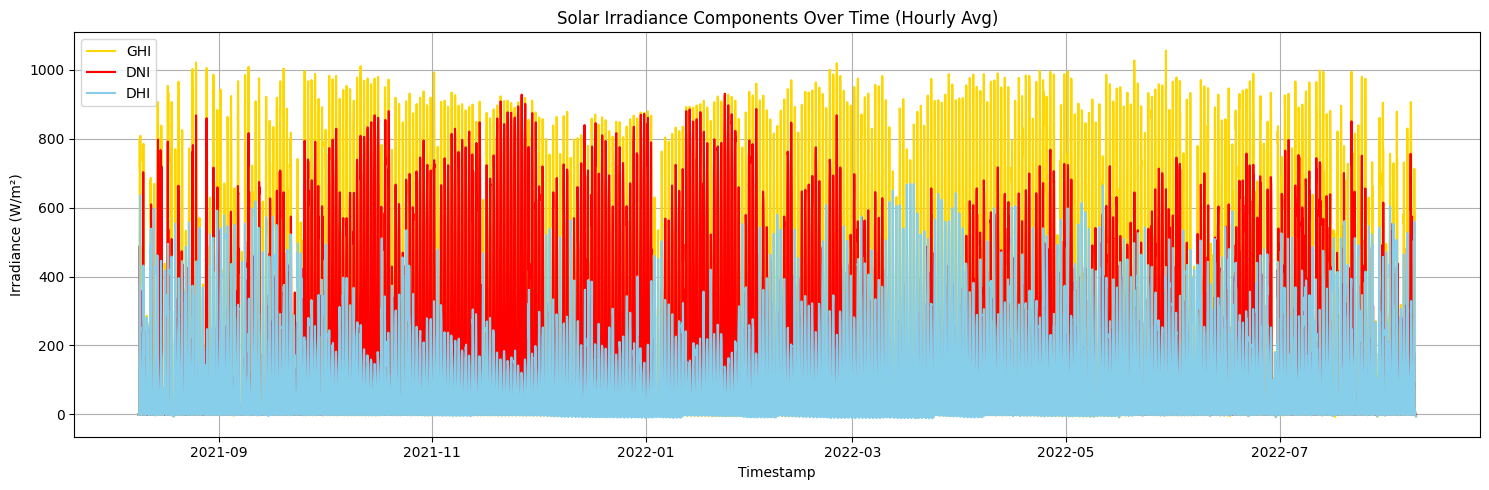

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


df_benin['Timestamp'] = pd.to_datetime(df_benin['Timestamp'])
df_benin.set_index('Timestamp', inplace=True)

# Optional: Resample to hourly average to reduce noise
df_hourly = df_benin[['GHI', 'DNI', 'DHI']].resample('H').mean()

# Plot
plt.figure(figsize=(15, 5))
plt.plot(df_hourly.index, df_hourly['GHI'], label='GHI', color='gold')
plt.plot(df_hourly.index, df_hourly['DNI'], label='DNI', color='red')
plt.plot(df_hourly.index, df_hourly['DHI'], label='DHI', color='skyblue')

plt.title('Solar Irradiance Components Over Time (Hourly Avg)')
plt.xlabel('Timestamp')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### Negative Irradiance Values Summary

| **Feature** | **# of Negative Values** | **% of Total Rows** |
|-------------|---------------------------|----------------------|
| **GHI**     | 258,847                   | ~49.3%               |
| **DNI**     | 275,987                   | ~52.5%               |
| **DHI**     | 259,182                   | ~49.3%               |

---

###  Interpretation

Negative values in irradiance data can be caused by:

-  **Nighttime readings**, when solar radiation should naturally be **0**, not negative.
-  **Sensor bias or drift**, where instruments slightly **dip below zero** due to low signal or calibration issues — especially at night.

While this behavior is **not abnormal in raw solar data**, negative irradiance values should be **Cleaned before analysis** or modeling So we do further analysis to know why it happens and by what to replace or clip.
This ensures physical accuracy and avoids misleading statistical summaries or visualizations.


C:\Users\ABC\AppData\Local\Temp\ipykernel_20536\1021170375.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df_benin[[col]].resample('H').mean()


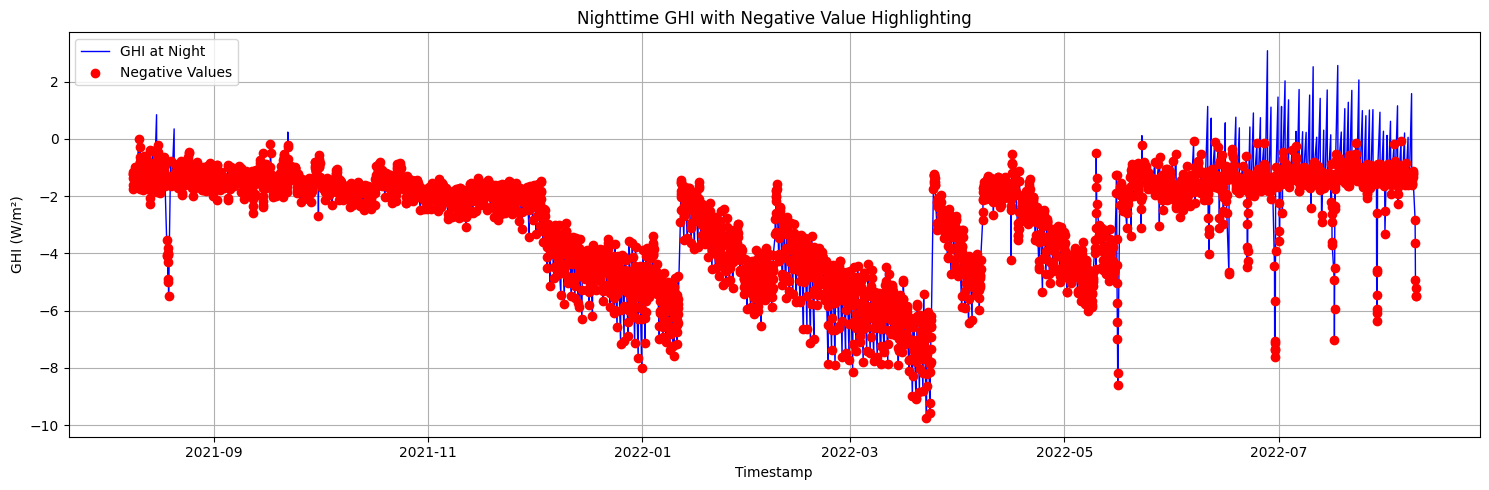

C:\Users\ABC\AppData\Local\Temp\ipykernel_20536\1021170375.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df_benin[[col]].resample('H').mean()


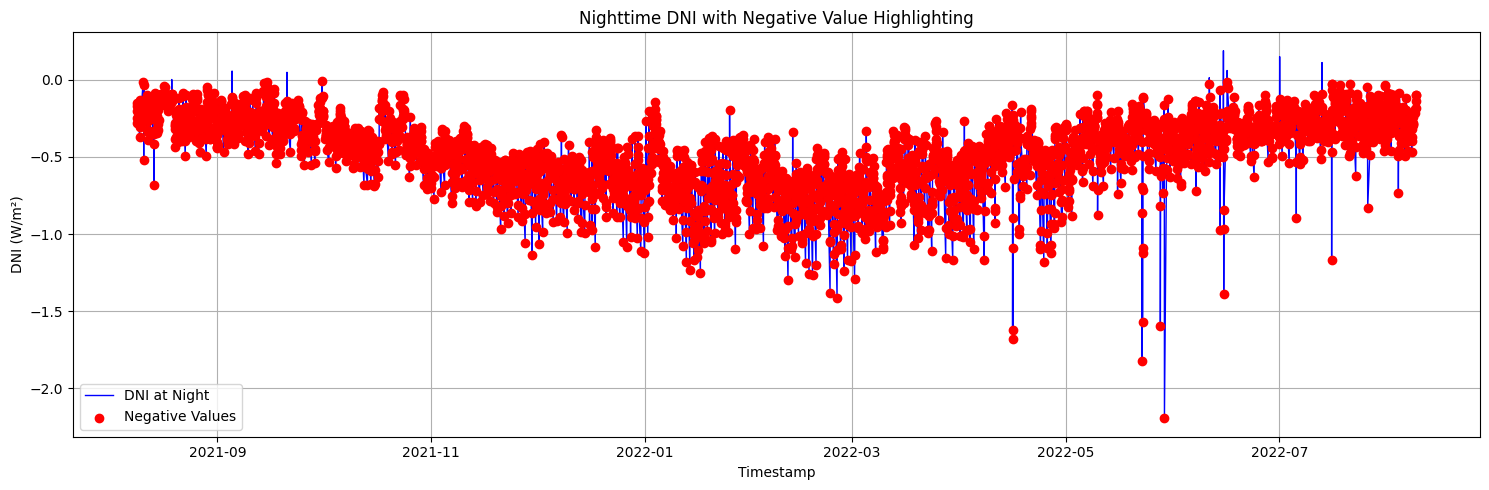

C:\Users\ABC\AppData\Local\Temp\ipykernel_20536\1021170375.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df_benin[[col]].resample('H').mean()


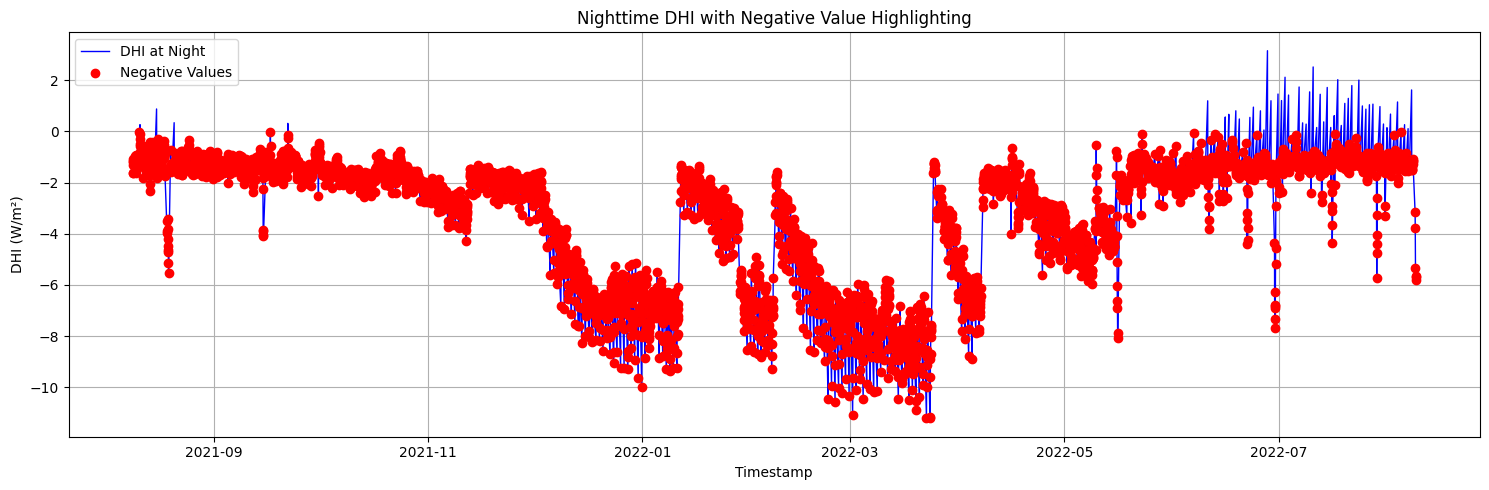

In [8]:
import pandas as pd
import matplotlib.pyplot as plt



# Loop through each irradiance component
for col in irradiance_cols:
    # Resample to hourly average
    df_hourly = df_benin[[col]].resample('H').mean()

    # Define hour and classify nighttime
    df_hourly['hour'] = df_hourly.index.hour
    df_hourly['is_night'] = ~df_hourly['hour'].between(6, 18)  # Night is before 6AM or after 6PM
    df_hourly['is_negative'] = df_hourly[col] < 0

    # Filter for nighttime data
    df_night = df_hourly[df_hourly['is_night']]

    # Plot irradiance during nighttime
    plt.figure(figsize=(15, 5))
    plt.plot(df_night.index, df_night[col], label=f'{col} at Night', color='blue', linewidth=1)

    # Highlight negative irradiance values
    negative_values = df_night[df_night['is_negative']]
    plt.scatter(negative_values.index, negative_values[col], color='red', label='Negative Values', zorder=3)

    # Add labels and show plot
    plt.title(f'Nighttime {col} with Negative Value Highlighting')
    plt.xlabel('Timestamp')
    plt.ylabel(f'{col} (W/m²)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### 🌙 Nighttime Irradiance Values and Data Cleaning

It is clearly shown that the **negative values in GHI, DNI, and DHI** correspond to the **nighttime period**—when the sun is no longer visible and solar radiation should, by physics, be zero.

 Why This Happens
These negative values are not physically meaningful; they likely result from:
- **Sensor bias or drift** at night
- **Baseline miscalibration** of the equipment
- **Electronic noise** during low-light conditions

Since solar irradiance is **energy from sunlight**, it should never be negative. Even on cloudy days, irradiance may be low, but not below zero. At night, it should naturally be **zero**.


As a result, **all negative values in GHI, DNI, and DHI were safely replaced with 0**, aligning with real-world solar physics and making the dataset more reliable for analysis and modeling.

 Why This Matters
Cleaning these values:
- Improves the accuracy of statistical summaries
- Prevents skewing machine learning models in later phases
- Helps identify real solar potential without artificial noise



In [9]:
# Replace all invalid negatives with 0
df_benin[irradiance_cols] = df_benin[irradiance_cols].clip(lower=0)


make all -ve value of **irradiance_cols** to **0** for better analysis by using .clip(replace all values with lower 0 with 0 )

In [10]:
import matplotlib.pyplot as plt

# Function to detect and plot time-series trends with optional smoothing
def plot_trend(df_benin, column, window=24, title_suffix='Trend Over Time'):
    """
    Plots a time-series line chart of a column with optional rolling average.

    Args:
        df (pd.DataFrame): DataFrame with datetime index.
        column (str): Column name to plot.
        window (int): Smoothing window (e.g. 24 = 1 day if hourly data).
        title_suffix (str): Title customization.

    Returns:
        None
    """
    if column not in df_benin.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame")

    plt.figure(figsize=(15, 5))

    # Raw data line
    plt.plot(df_benin.index, df_benin[column], color='lightgray', alpha=0.5, label='Raw')

    # Smoothed trend line
    smoothed = df_benin[column].rolling(window=window, min_periods=1).mean()
    plt.plot(df_benin.index, smoothed, color='crimson', linewidth=2, label=f'{column} ({window}-pt avg)')

    plt.title(f'{column} {title_suffix}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.show()


C:\Users\ABC\AppData\Local\Temp\ipykernel_20536\2566747832.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\ABC\Desktop\10Acadamy\solar_analysis_code\solar-site-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


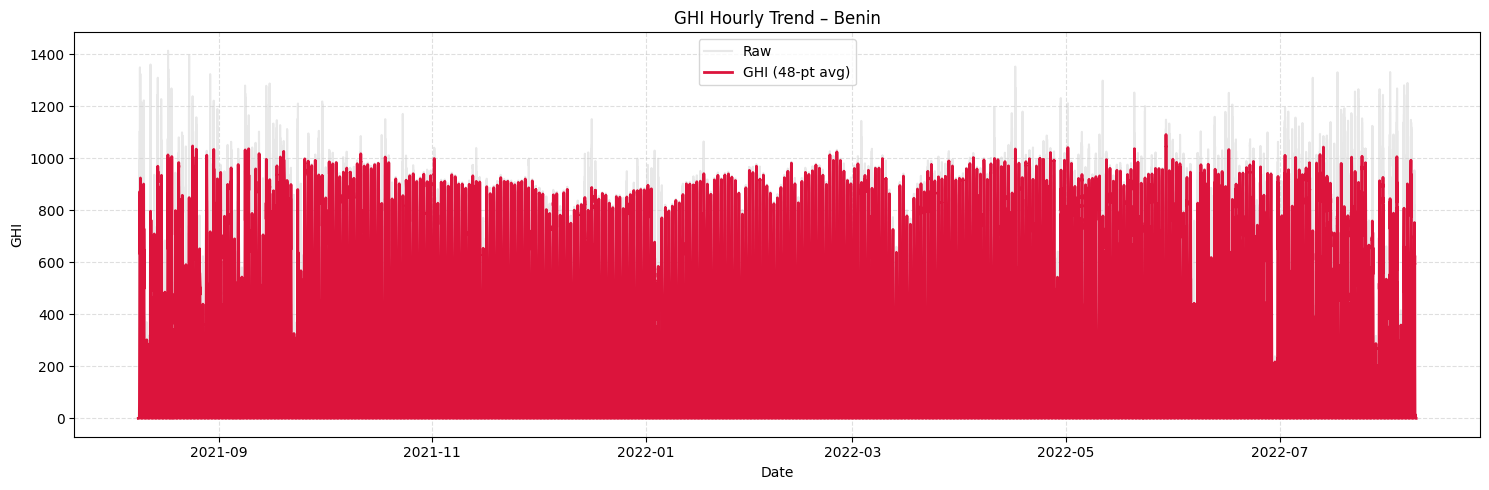

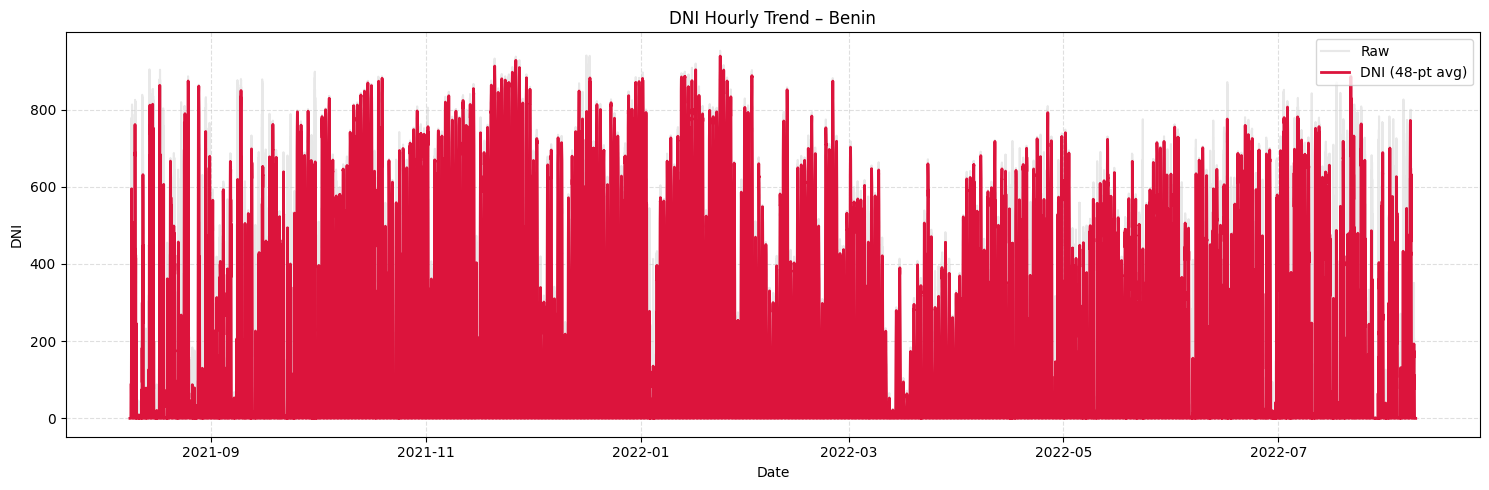

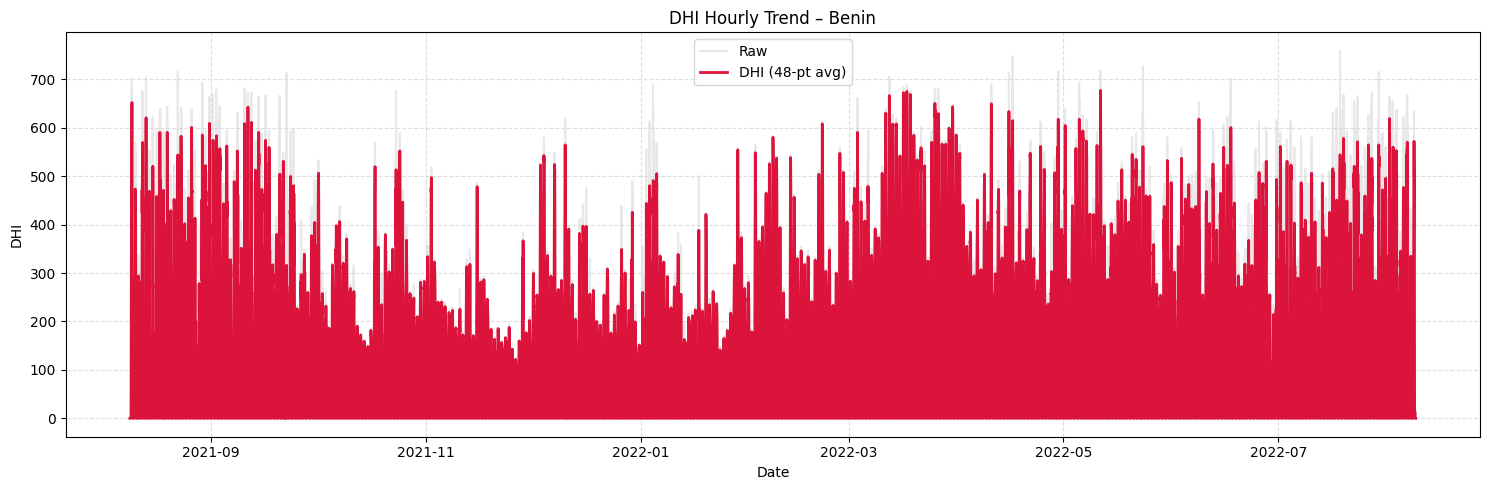

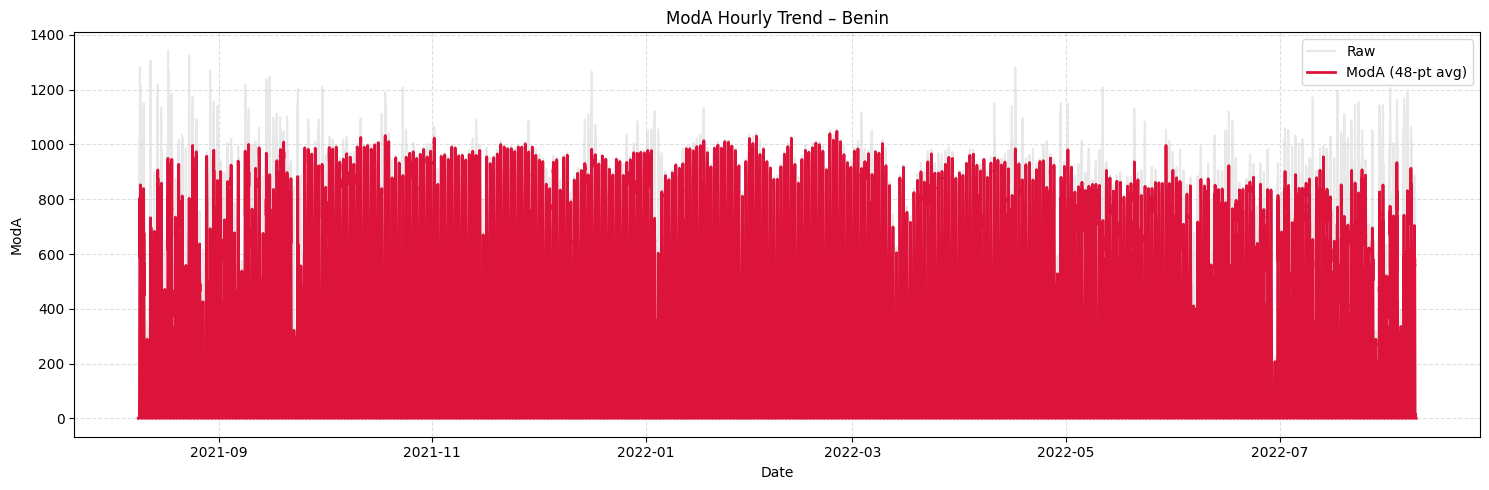

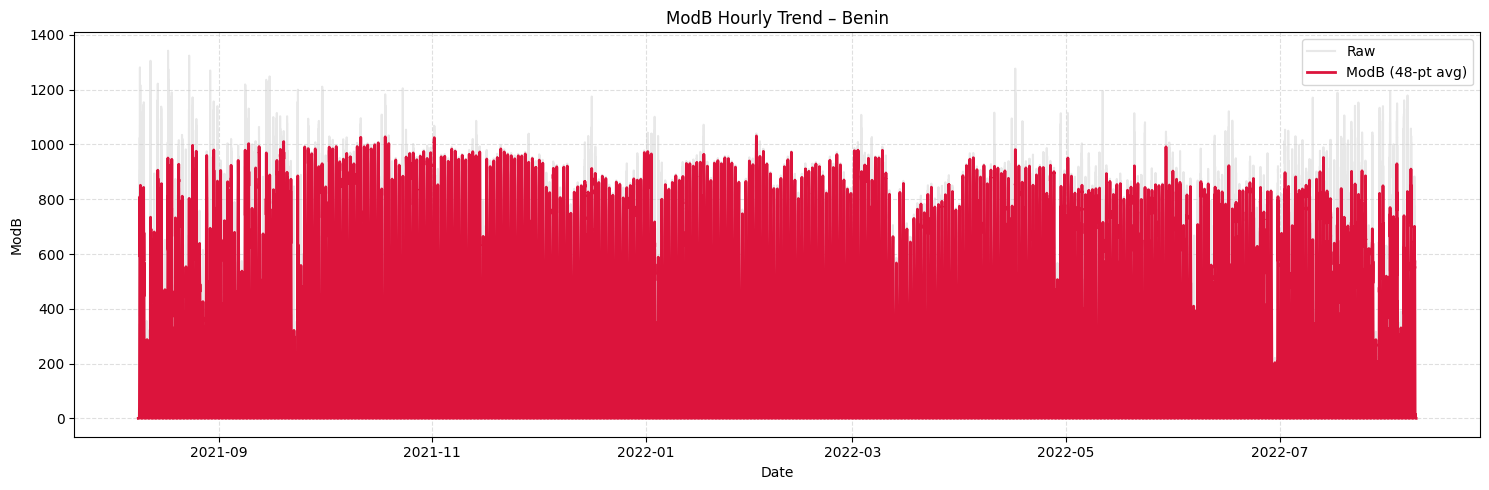

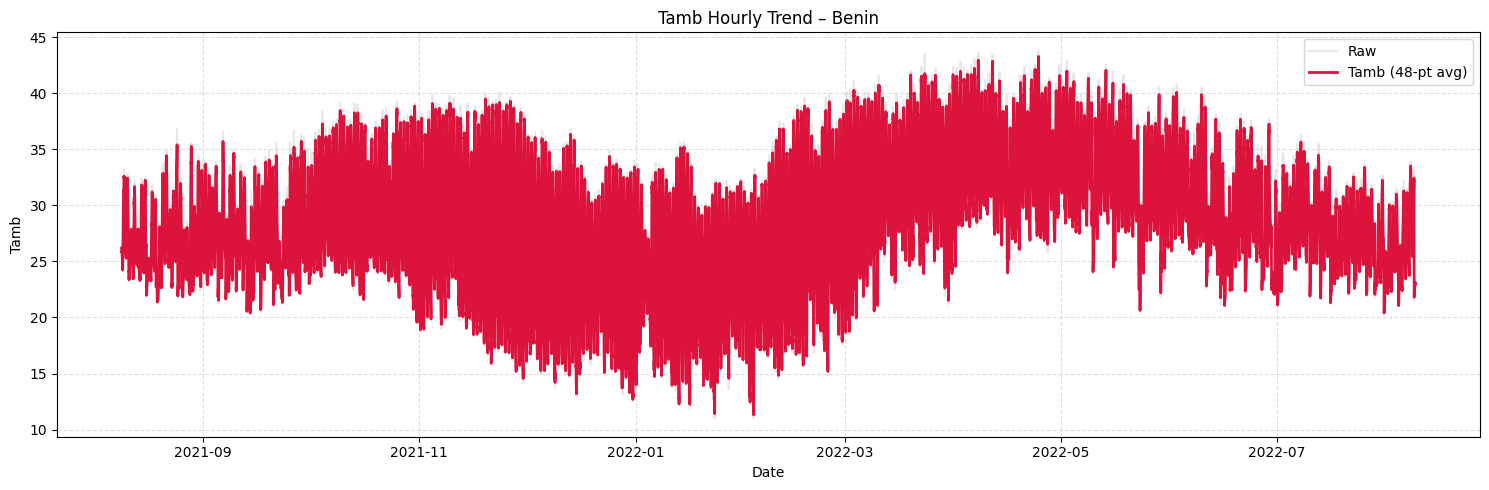

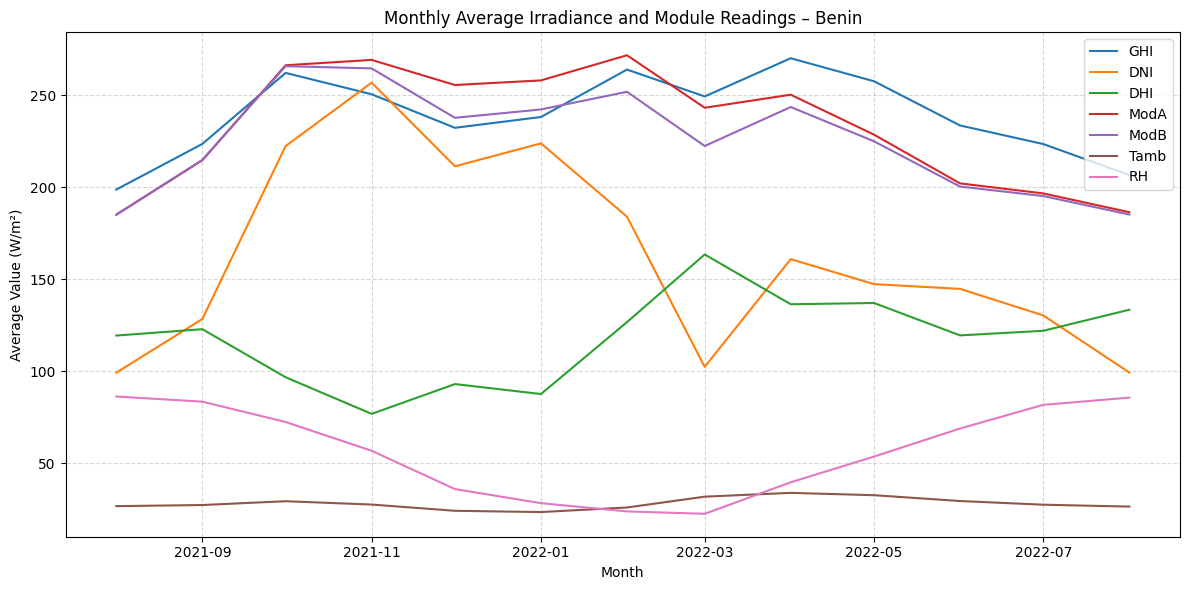

In [11]:
# Ensure df_benin has datetime index
plot_trend(df_benin, 'GHI', window=48, title_suffix='Hourly Trend – Benin')
plot_trend(df_benin, 'DNI', window=48, title_suffix='Hourly Trend – Benin')
plot_trend(df_benin, 'DHI', window=48, title_suffix='Hourly Trend – Benin')
plot_trend(df_benin, 'ModA', window=48, title_suffix='Hourly Trend – Benin')
plot_trend(df_benin, 'ModB', window=48, title_suffix='Hourly Trend – Benin')
plot_trend(df_benin,'Tamb', window=48, title_suffix='Hourly Trend – Benin')

# Create a new column 'Month' from the datetime index
df_benin['Month'] = df_benin.index.to_period('M')


# Group by month and compute average of key variables
monthly_avg = df_benin.groupby('Month')[['GHI', 'DNI', 'DHI', 'ModA', 'ModB','Tamb','RH']].mean()

# Plot the monthly average trends
plt.figure(figsize=(12, 6))
for col in monthly_avg.columns:
    plt.plot(monthly_avg.index.to_timestamp(), monthly_avg[col], label=col)

plt.title('Monthly Average Irradiance and Module Readings – Benin')
plt.xlabel('Month')
plt.ylabel('Average Value (W/m²)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### ☀️ Seasonal Solar Irradiance Analysis – Benin (GHI, DNI, DHI)

The irradiance trends in Benin closely reflect the country's **climatic seasons**, especially the transition from the **rainy season** to the **dry, high-sun (ninìn)** season.

---

####  **May to July: Rainy Season**
- All three irradiance components — **GHI, DNI, and DHI** — **drop significantly**.
- This indicates **thick cloud cover**, high humidity, and poor solar penetration.
- A low-solar window with reduced photovoltaic efficiency.

---

####  **August to Mid-September: Transitional Period**
- **GHI begins to rise gradually**, though with **fluctuations**, suggesting:
  - Partially clearing skies.
  - Intermittent sunlight and cloud cover.
- Represents the **tail-end of the rainy season** in northern Benin (e.g., Malanville).

---

####  **Late September to October: Solar Shift**
- **DNI (Direct Normal Irradiance)** increases **sharply**, while **DHI (Diffuse)** drops.
- This suggests:
  - **Clearer skies** with low atmospheric scattering.
  - A **transition into the dry season**.
  - High direct sunlight — optimal for **solar panel efficiency**.

---

####  **November to January: Peak High-Sun (Ninìn) Season**
- **November**:
  - **DNI reaches its peak**.
  - **DHI is at its minimum**.
  - **GHI is high**, powered by strong direct irradiance.
- These months reflect **clear skies, dry air**, and **ideal solar harvesting** conditions.

---

####  **February: Balanced Solar Window**
- Both **DNI and DHI stabilize** into moderate levels.
- **GHI remains strong**, supported by balanced contributions from both direct and scattered light.
- Represents a **second solar-friendly period** before the rainy season returns.

---

### Summary
> The solar irradiance data from Benin confirms the expected seasonal pattern: **low radiation during May–July**, a **rising trend in August–September**, and **high, clear-sky solar performance from October to February**, with **November marking the solar peak**. These insights are crucial for optimizing solar system performance and planning installation timelines.



In [12]:
from scipy.stats import zscore
import numpy as np
#  Columns to compute Z-scores for
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

z_scores = df_benin[cols_to_check].apply(zscore)
# Step 2: Create a mask of where Z-scores are beyond the threshold
z_outlier_mask = np.abs(z_scores) > 3

# Step 3: Flag rows where any column is an outlier
rows_with_outliers = z_outlier_mask.any(axis=1)

# Step 4: Return original values AND which columns were the trigger
outlier_info = df_benin[rows_with_outliers].copy()
outlier_info['z_outlier_cols'] = z_outlier_mask[rows_with_outliers].apply(
    lambda row: ', '.join(row[row].index.tolist()), axis=1
)

# Show the first few rows
outlier_info[['z_outlier_cols'] + cols_to_check]

,z_outlier_cols,GHI,DNI,DHI,ModA,ModB,WS,WSgust
Timestamp,,,,,,,,
2021-08-09 11:11:00,DHI,836.0,235.0,610.6,778.8,783.8,3.2,4.1
2021-08-09 11:12:00,"GHI, DHI, ModB",1274.0,698.8,615.2,1210.3,1210.3,3.4,4.1
2021-08-09 11:13:00,DHI,938.0,340.1,612.8,891.1,891.1,3.4,4.6
2021-08-09 11:14:00,DHI,718.5,126.8,593.2,682.6,682.6,4.7,5.6
2021-08-09 11:15:00,"GHI, DHI, ModA, ModB",1349.0,771.8,618.0,1281.5,1281.5,4.0,4.6
...,...,...,...,...,...,...,...,...
2022-08-08 16:22:00,"WS, WSgust",4.6,0.0,4.6,6.1,5.9,7.1,9.7
2022-08-08 16:23:00,WSgust,4.6,0.2,4.6,5.9,5.8,6.5,9.2
2022-08-08 16:24:00,WSgust,4.5,0.0,4.5,5.8,5.7,6.7,8.9


---
### Z-Score > 3 Outlier Analysis

The **Z-score** is a statistical measure that tells us how far a data point is from the mean in terms of standard deviations. It is calculated as:

> **Z = (value − mean) / standard deviation**

A **Z-score > 3 or < -3** typically means the value is an extreme outlier (i.e., it's more than 3 standard deviations away from the average). This helps us identify rare, abnormal readings in our solar measurements — such as sensor malfunctions, sudden environmental changes, or peak sunlight events.

---

In [13]:
#df_benin['z_outlier'] = rows_with_outliers
#df_benin[df_benin['z_outlier'] == True]


In [14]:
# Your local path to save the file
#save_path = r"C:\Users\ABC\Desktop\10Acadamy\solar_analysis_code\solar-site-analysis\data\z_outlier_flags.csv"

# Save the DataFrame with outliers
#outlier_info[['z_outlier_cols'] + cols_to_check].to_csv(save_path)

#print(f"Outliers successfully saved at {save_path}")


In [15]:
import pandas as pd
from collections import defaultdict

# Load your CSV file
df_outlier = pd.read_csv("C:/Users/ABC/Desktop/10Acadamy/solar_analysis_code/solar-site-analysis/data/z_outlier_flags.csv", parse_dates=['Timestamp'])

# Extract hour from timestamp
df_outlier['Hour'] = df_outlier['Timestamp'].dt.hour

# Define time intervals
time_intervals = {
    "Midday (11AM - 1PM)": range(11, 14),
    "Midnight (11PM - 1AM)": [23, 0, 1],
    "After Midday (1PM - 11PM)": range(14, 23),
    "After Midnight (1AM - 11AM)": range(2, 11)
}

# Initialize results storage
results = defaultdict(lambda: defaultdict(int))

# Iterate over each row to count outliers per column per interval
for _, row in df_outlier.iterrows():
    cols = row['z_outlier_cols'].split(', ')
    hour = row['Hour']

    # Determine the time interval (corrected keys)
    if hour in time_intervals["Midday (11AM - 1PM)"]:
        interval = "Midday (11AM - 1PM)"
    elif hour in time_intervals["Midnight (11PM - 1AM)"]:
        interval = "Midnight (11PM - 1AM)"
    elif hour in time_intervals["After Midnight (1AM - 11AM)"]:
        interval = "After Midnight (1AM - 11AM)"
    elif hour in time_intervals["After Midday (1PM - 11PM)"]:
        interval = "After Midday (1PM - 11PM)"
    else:
        interval = "Other Times"

    # Increment counts for each column flagged as outlier
    for col in cols:
        results[col][interval] += 1

# Convert results into a DataFrame for clearer interpretation
time_analysis_df = pd.DataFrame(results).fillna(0).astype(int).T

print("\n🌞 Outlier Counts by Time of Day for Each Column 🌜")
print(time_analysis_df)



🌞 Outlier Counts by Time of Day for Each Column 🌜
        Midday (11AM - 1PM)  After Midday (1PM - 11PM)  \
DHI                    3404                        376   
GHI                      81                          9   
ModB                     58                          5   
ModA                     26                          1   
WS                      386                        796   
WSgust                  441                        867   
DNI                       2                          0   

        After Midnight (1AM - 11AM)  Midnight (11PM - 1AM)  
DHI                             109                      0  
GHI                               0                      0  
ModB                              0                      0  
ModA                              0                      0  
WS                             1435                    492  
WSgust                         1629                    563  
DNI                               0                      




### Interpretation & Strategic Takeaways

#### **Solar Irradiance Trends**
- **DHI dominates midday outliers (3,404)** — reflects **atmospheric scattering peaks** during solar noon. These are **expected and valuable signals** for studying sky clarity and solar potential.
- **GHI and DNI outliers are rare**, reinforcing their **sensor stability**.
- **GHI peaks only at midday**, making it a reliable indicator of **direct solar availability**.
- **DNI outliers are negligible (2 total)** — suggesting **high reliability and less variability** in direct solar measurement.

####  **Sensor Stability**
- **ModA and ModB** have very few outliers, mostly concentrated at **midday** — this implies that **module sensor performance is consistent** except during high solar spikes.
- These outliers may reflect **actual thermal or energy surges**, not measurement error.

####  **Wind Risk Assessment**
- **WS and WSgust outliers are concentrated after midnight and in the evening**:
  - WSgust: 1629 (After Midnight), 867 (After Midday)
  - WS: 1435 (After Midnight), 796 (After Midday)
- This highlights **frequent late-night and evening gust events** — critical for:
  - Structural design
  - Mounting angles
  - Panel reinforcement
- **Fewer wind anomalies at midday** reduces solar-wind interference during peak harvest hours.

---




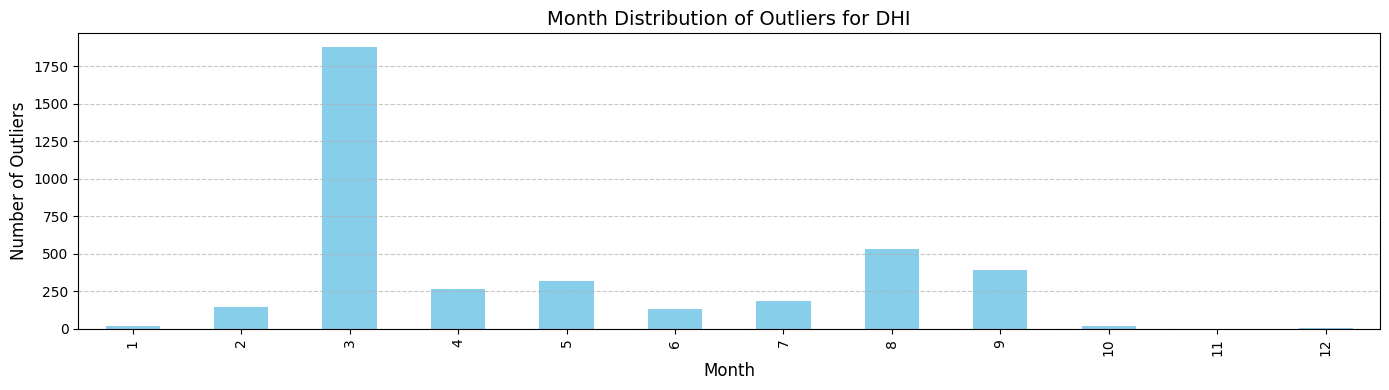

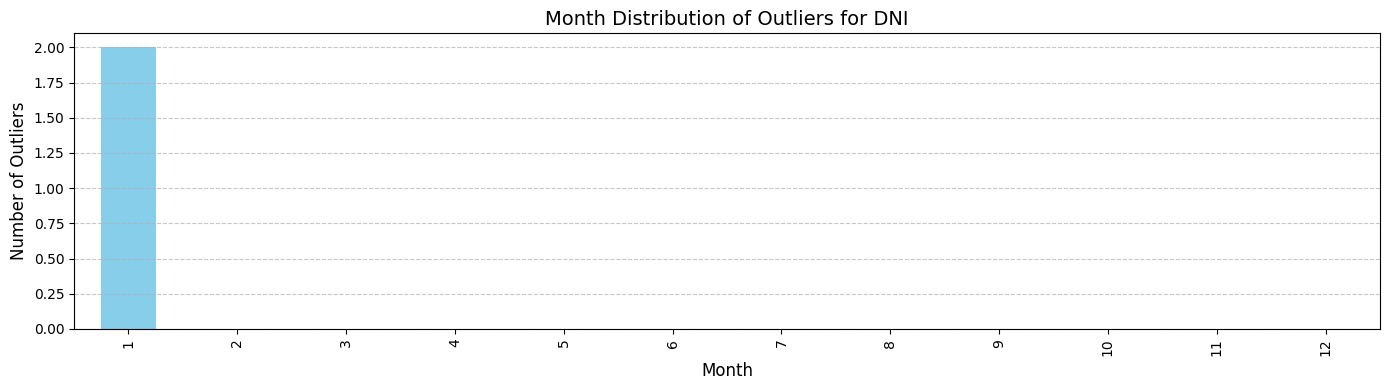

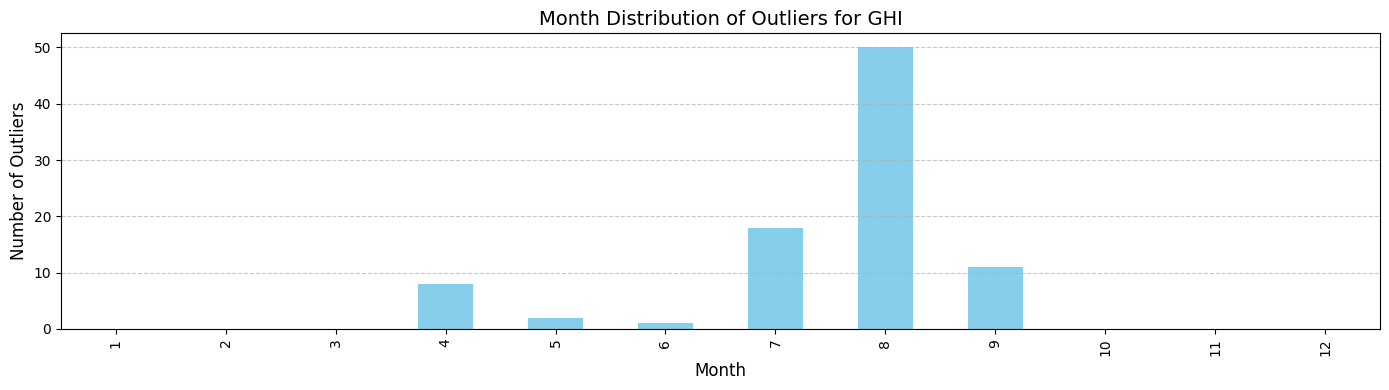

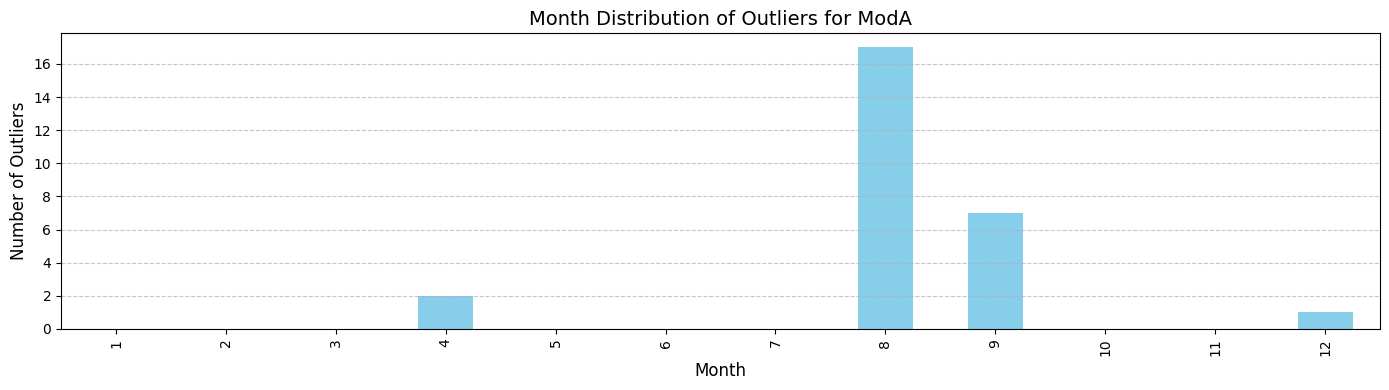

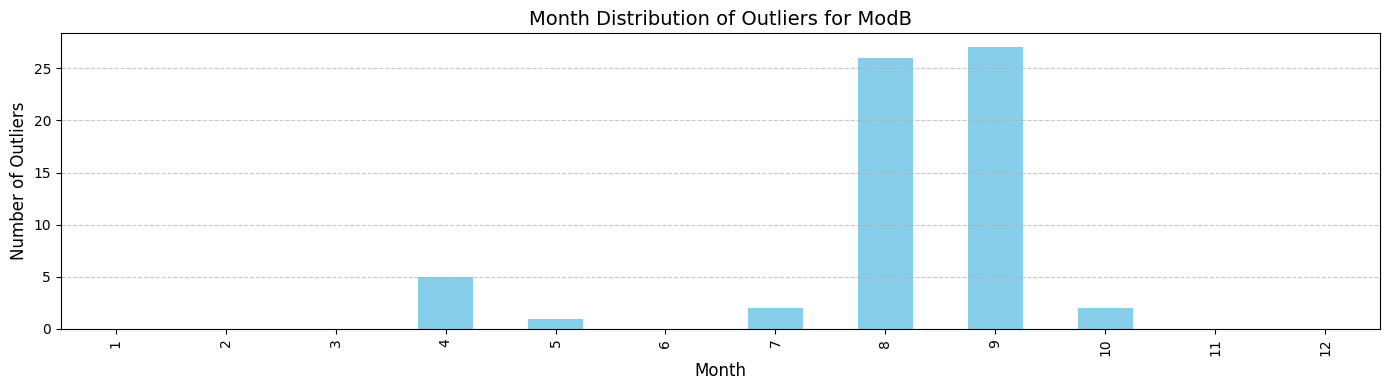

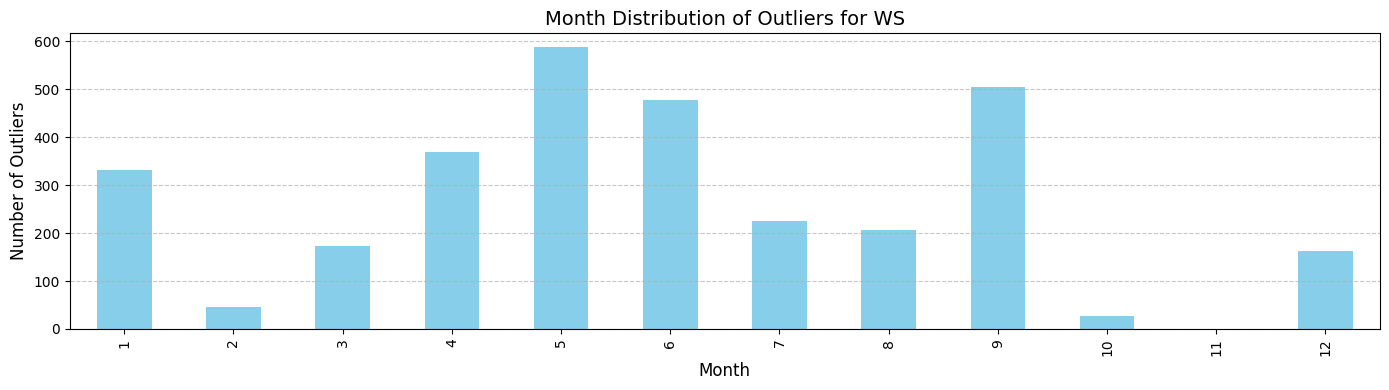

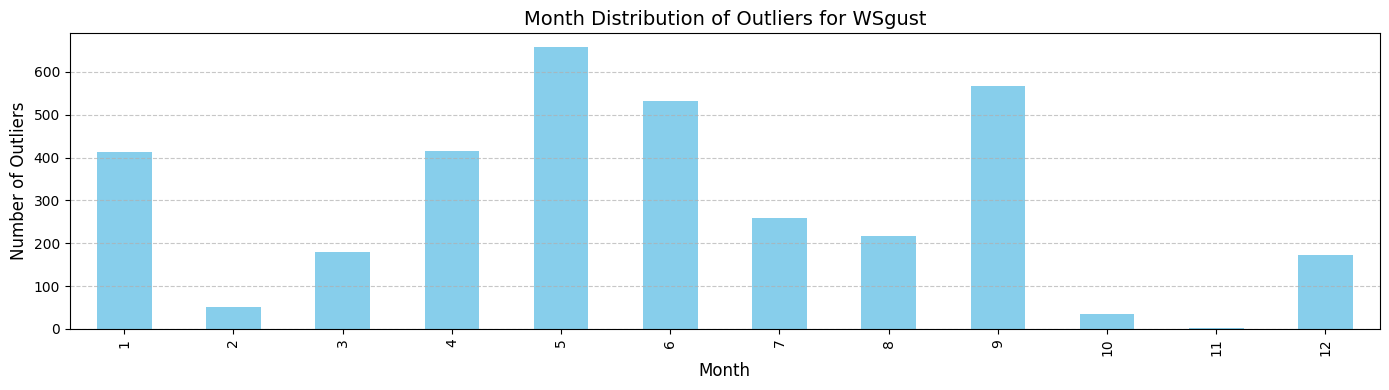

In [16]:
# Extract date
df_outlier['Month'] = df_outlier['Timestamp'].dt.month

# Expand columns flagged as outliers
outlier_cols_expanded = df_outlier.assign(
    z_outlier_cols=df_outlier['z_outlier_cols'].str.split(', ')
).explode('z_outlier_cols')

# Count occurrences by date for each outlier column
date_distribution = outlier_cols_expanded.groupby(['z_outlier_cols', 'Month']).size().unstack(fill_value=0)

# Plot each outlier column's date distribution
for col in date_distribution.index:
    plt.figure(figsize=(14, 4))
    date_distribution.loc[col].plot(kind='bar', color='skyblue')
    plt.title(f'Month Distribution of Outliers for {col}', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Outliers', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



#### Interpretation of Outlier Patterns

**→** Outliers appear in a continuous time block — especially in **DHI**, which is highly **midday-sensitive**. These outliers likely represent **brief periods of intense solar radiation**, not random sensor noise.

**→** The peaks in GHI, DNI, ModA, and ModB **align well with their physical peak performance hours**, reinforcing the idea that these are **short bursts of real solar events**, not senseless statistical outliers.

**→** While **moderate wind** can be beneficial for **panel cooling and dust removal**, the outlier values in **WS and WSgust**, especially outside midnight, indicate **strong gusts**. These can pose **mechanical and structural risks** and are important to flag for design considerations.

**→** Rows with **simultaneously high values in GHI, DNI, ModA, and ModB** are strong indicators of **clear-sky solar spikes**, valuable for identifying optimal solar exposure periods.

**→** Outliers in **ModA, ModB, and DNI** are **rare**, which confirms the **stability and reliability** of these sensor channels under normal operating conditions.

> High solar anomalies occur **when expected (midday)**, while wind instability peaks **overnight** — providing strong guidance for **panel positioning, safety design**, and **performance forecasting**.

- **November to February** remains the **ideal window** for solar collection.
- **Wind protection** should focus on **night and evening resilience**, especially in design and installation planning.
---

###  Why Z-Score Outlier Detection Helps

-  **Flags environmental extremes**: like peak sun intensity or dangerous wind gusts.
-  **Helps clean the dataset** without blindly dropping values.
-  **Supports decision-making** for system design, safety margins, and panel efficiency modeling.
-  **Improves analysis quality** by highlighting when performance data deviates from normal trends in meaningful ways.

---

> **Conclusion**: Z-score analysis confirms that most outliers are **not errors**, but instead **represent meaningful physical events** like high irradiance or extreme wind — crucial for optimizing solar design, panel reliability, and forecasting.


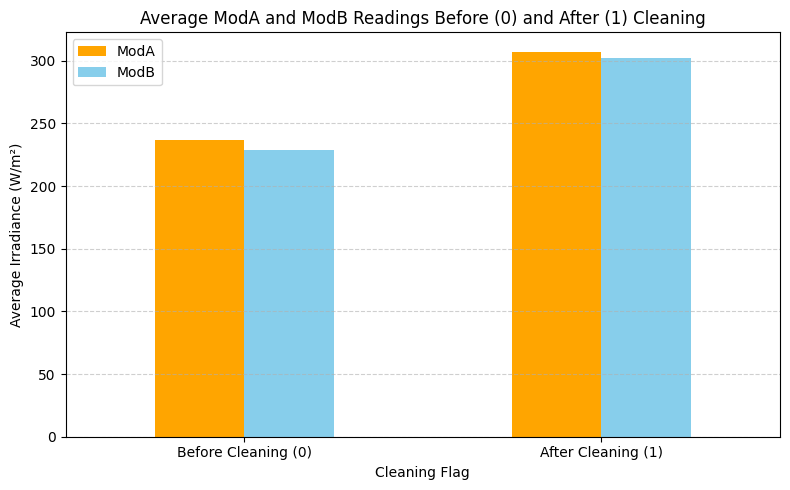

In [17]:
# Group by 'Cleaning' flag and compute average ModA and ModB
avg_by_cleaning = df_benin.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plot
avg_by_cleaning.plot(kind='bar', figsize=(8, 5), color=['orange', 'skyblue'])
plt.title("Average ModA and ModB Readings Before (0) and After (1) Cleaning")
plt.ylabel("Average Irradiance (W/m²)")
plt.xlabel("Cleaning Flag")
plt.xticks(ticks=[0, 1], labels=['Before Cleaning (0)', 'After Cleaning (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

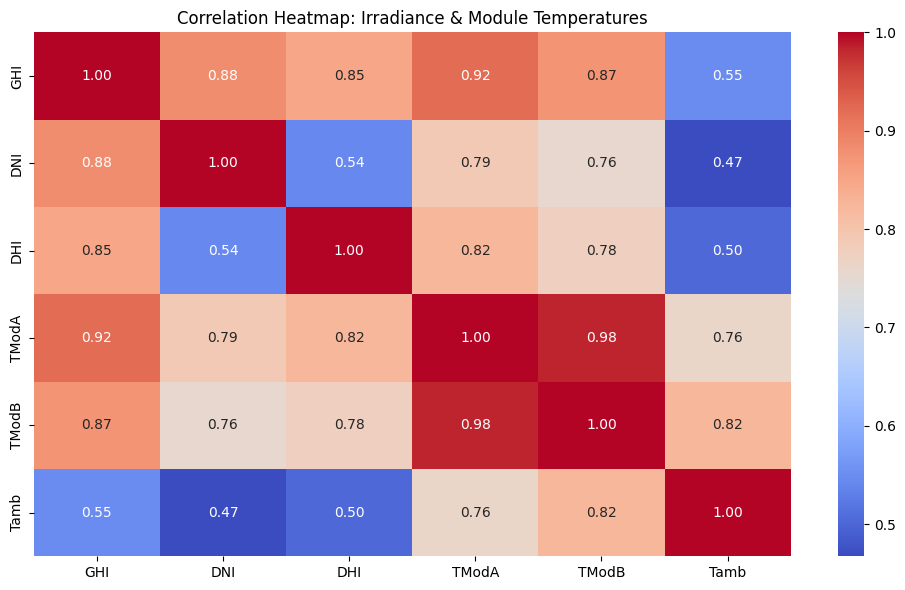

In [18]:
import seaborn as sns
# Drop rows with NaNs in relevant columns
df_clean = df_benin[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD', 'RH', 'Tamb']].dropna()

# 1. Heatmap of correlations
plt.figure(figsize=(10, 6))
corr_matrix = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB','Tamb']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Irradiance & Module Temperatures')
plt.tight_layout()
plt.show()

### 🔗 Correlation Analysis Summary

A correlation heatmap analysis revealed strong linear relationships among key solar and temperature variables:

#### ✅ Strong Correlation (≥ 0.80)
| Pair             | Correlation Strength | Interpretation                                |
|------------------|----------------------|-----------------------------------------------|
| **GHI ~ DNI**    | Very High            | More direct sunlight leads to stronger GHI    |
| **GHI ~ DHI**    | High                 | Scattered light also contributes to GHI       |
| **GHI ~ TModA**  | High                 | Panels heat up with increasing sunlight       |
| **GHI ~ TModB**  | High                 | Consistent thermal response across modules    |
| **TModA ~ TModB**| Very High            | Synchronized temperature rise in both sensors |

---

### 🧠 Interpretation & Implications

- **GHI acts as a central hub**, tightly linked to both **direct (DNI)** and **diffuse (DHI)** components.
- The high correlation between **module temperatures (TModA & TModB)** and **irradiance** shows that:
  - These modules respond sensitively and consistently to solar intensity.
  - Monitoring panel temperature can serve as a **proxy for sunlight strength**, aiding fault detection or solar forecasting.
- **DNI and DHI both contribute strongly to GHI**, confirming physical correctness of the dataset.

---

> 📈 **Conclusion**: The data shows a physically consistent and statistically strong relationship between irradiance and thermal response, confirming the **reliability** of Benin's measurements and offering useful predictors for solar yield and panel behavior modeling.



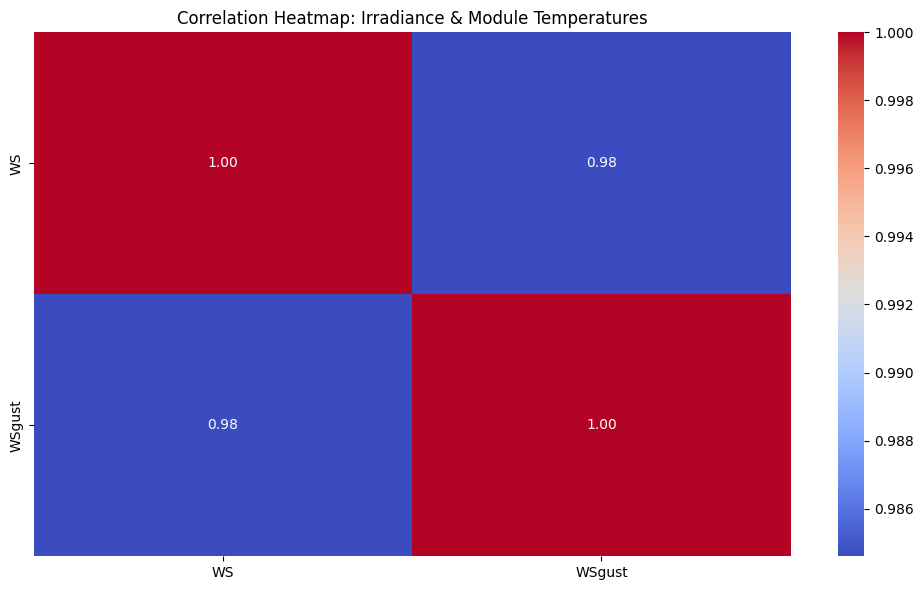

In [19]:
# 1. Heatmap of correlations
plt.figure(figsize=(10, 6))
corr_matrix = df_clean[[ 'WS', 'WSgust']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Irradiance & Module Temperatures')
plt.tight_layout()
plt.show()

###  Wind Speed Correlation Analysis

An analysis of wind-related variables reveals a **very strong correlation**:

####  Strong Correlation (0.98)
| Pair             | Correlation Strength | Interpretation                                      |
|------------------|----------------------|-----------------------------------------------------|
| **WS ~ WSgust**  | **Very High (0.98)** | Gust speed closely tracks average wind speed, indicating consistent wind behavior over time |

---

### Interpretation & Implications

- **WS (Wind Speed)** and **WSgust (Wind Gust Speed)** are almost perfectly correlated.
- This suggests that:
  - When average wind speed increases, gusts increase nearly proportionally.
  - The environment exhibits **predictable wind dynamics**, not erratic or isolated gust spikes.
- **Design Consideration**:
  - Reinforcements for panel structures should consider **continuous wind stress**, not just rare gusts.
  - Ideal for modeling wind loading and fatigue — high correlation reduces unpredictability.

---

> 🌪️ **Conclusion**: The 0.98 correlation between wind speed and gusts reflects **consistent wind behavior** in the Benin dataset. This makes wind-related risk **quantifiable** and supports accurate **structural safety modeling** for solar infrastructure.



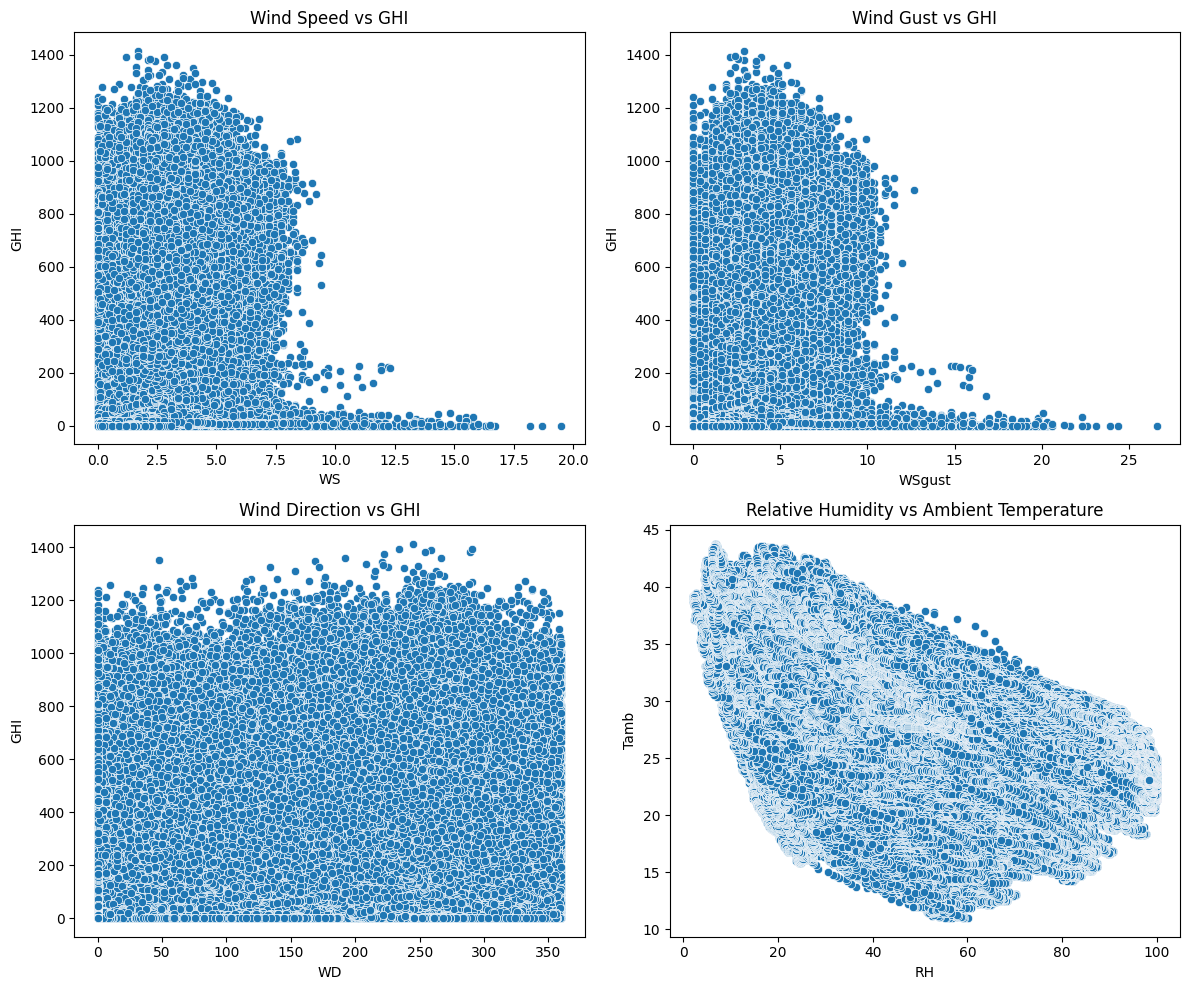

In [20]:
# 2. Scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(data=df_clean, x='WS', y='GHI', ax=axes[0, 0])
axes[0, 0].set_title('Wind Speed vs GHI')

sns.scatterplot(data=df_clean, x='WSgust', y='GHI', ax=axes[0, 1])
axes[0, 1].set_title('Wind Gust vs GHI')

sns.scatterplot(data=df_clean, x='WD', y='GHI', ax=axes[1, 0])
axes[1, 0].set_title('Wind Direction vs GHI')

sns.scatterplot(data=df_clean, x='RH', y='Tamb', ax=axes[1, 1])
axes[1, 1].set_title('Relative Humidity vs Ambient Temperature')
plt.tight_layout()
plt.show()

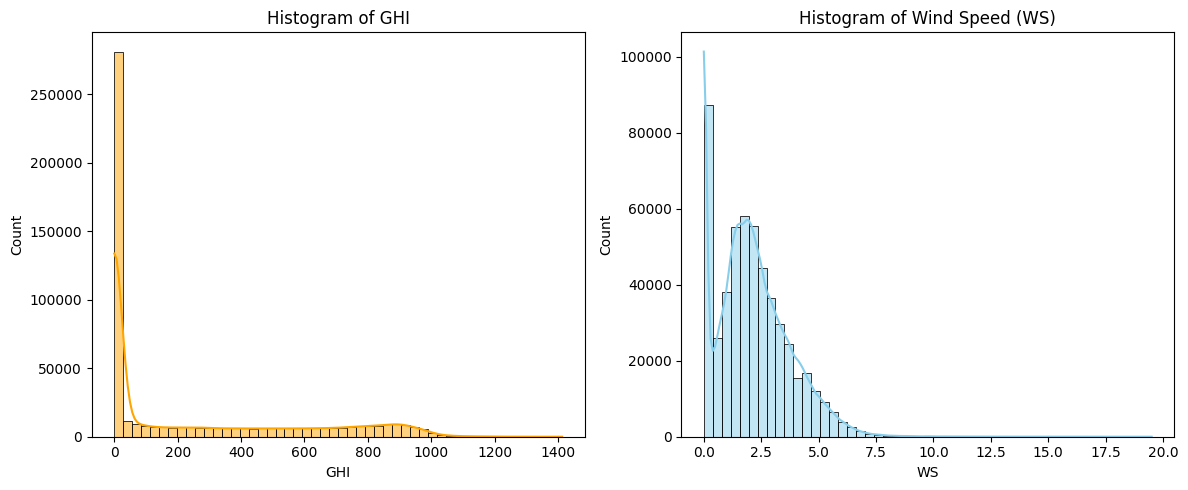

In [21]:
# 3. Histograms for GHI and WS
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_clean['GHI'], bins=50, kde=True, ax=ax[0], color='orange')
ax[0].set_title('Histogram of GHI')

sns.histplot(df_clean['WS'], bins=50, kde=True, ax=ax[1], color='skyblue')
ax[1].set_title('Histogram of Wind Speed (WS)')
plt.tight_layout()
plt.show()

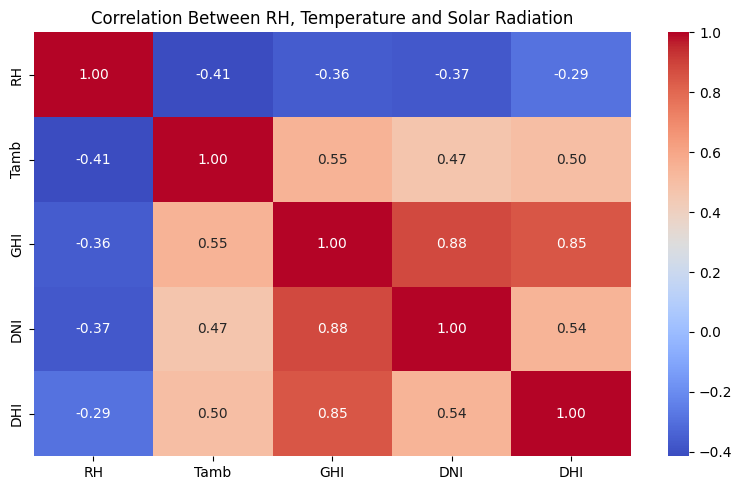

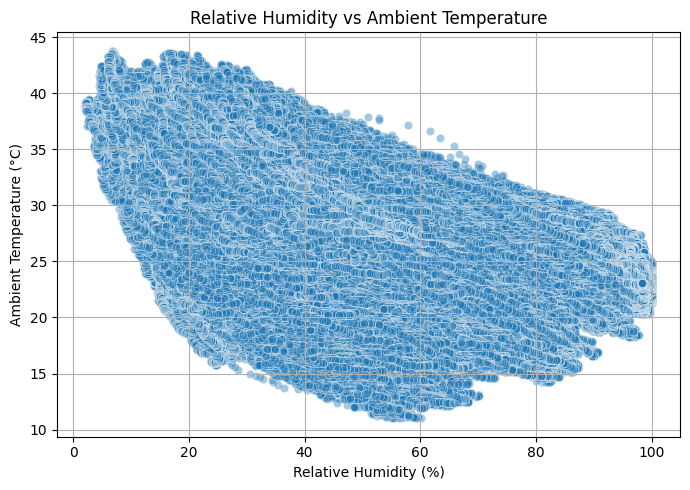

In [22]:
# Drop rows with NaNs in relevant columns
df_clean = df_benin[['RH', 'Tamb', 'GHI', 'DNI', 'DHI']].dropna()

# 1. Correlation Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between RH, Temperature and Solar Radiation")
plt.tight_layout()
plt.show()

# 2. Scatter plot: RH vs Tamb
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.4)
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


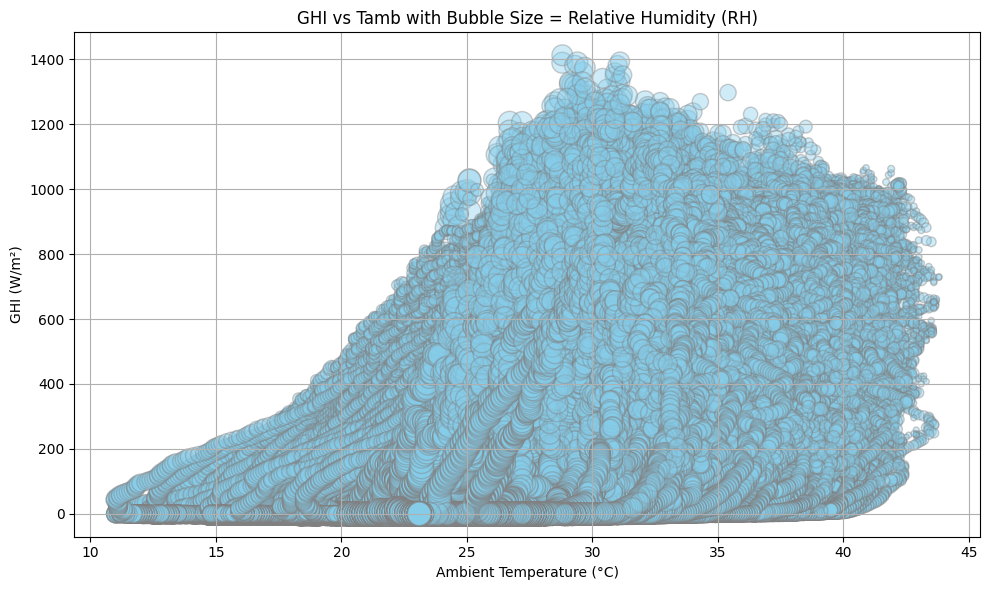

In [23]:
# Drop rows with missing values in relevant columns
df_clean = df_benin[['GHI', 'Tamb', 'RH', 'BP']].dropna()
# Normalize RH and BP for visual scaling (bubble size)
df_clean['RH_scaled'] = df_clean['RH'] / df_clean['RH'].max() * 300  # bubble size
df_clean['BP_scaled'] = df_clean['BP'] / df_clean['BP'].max() * 300

# 1. Bubble chart with RH as size
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Tamb'], df_clean['GHI'], s=df_clean['RH_scaled'], alpha=0.4, color='skyblue', edgecolors='gray')
plt.title('GHI vs Tamb with Bubble Size = Relative Humidity (RH)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.tight_layout()
plt.show()